# Mapeando el Universo



## Aprendizaje No Supervisado

### Clasificación del tipo morfológico de galaxias

  * Implementar algoritmos de _clustering_ para encontrar conjuntos de datos con propiedades similares.
  
    + Elegir un subconjunto de columnas a su elección (excluir los datos espectroscópicos) y aplicar al menos dos algoritmos de _clustering_ (k-means y dbscan, por ejemplo)
    + Analizar/determinar el número de _clusters_ que pueden ser identificados
    + Comparar los _clusters_ encontrados contra la clasificación del tipo morfológico de galaxias 
        
**EXTRA**: Explorar los métodos de _embeddings_ para ver si es posible reducir la dimensión del problema o encontrar otro espacio en el cual la separación en tipo morfológicos sea más sencilla.
    
   

### Lectura de datos

Esto es una manera, pueden utilizar las que más les convenga

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
filename = "~/DiploDatos_clean.csv"

In [5]:
df = pd.read_csv(filename,index_col=0)

In [6]:
df['modelColor_ug'] = df['modelMag_u'] - df['modelMag_g']
df['modelColor_gr'] = df['modelMag_g'] - df['modelMag_r']
df['modelColor_ri'] = df['modelMag_r'] - df['modelMag_i']
df['modelColor_iz'] = df['modelMag_i'] - df['modelMag_z']
df['petroColor_ug'] = df['petroMag_u'] - df['petroMag_g']
df['petroColor_gr'] = df['petroMag_g'] - df['petroMag_r']
df['petroColor_ri'] = df['petroMag_r'] - df['petroMag_i']
df['petroColor_iz'] = df['petroMag_i'] - df['petroMag_z']

### Uniendo dataframes

Vamos a ir un poco más allá y vamos a unir la tabla anterior con otra donde para algunas de las galaxias la gente a votado si se corresponde con una galaxia espiral, eliptica o irregular.

In [14]:
filename = '~/DiploDatos_Zoo.csv'

In [15]:
zoo = pd.read_csv(filename,index_col=0)

In [16]:
data = df.join(zoo)

In [17]:
data.describe()

,z,subClass_AGN,subClass_AGN BROADLINE,subClass_BROADLINE,subClass_STARBURST,subClass_STARBURST BROADLINE,subClass_STARFORMING,subClass_STARFORMING BROADLINE,subClass_UNKNOWN,velDisp,...,modelColor_gr,modelColor_ri,modelColor_iz,petroColor_ug,petroColor_gr,petroColor_ri,petroColor_iz,spiral,elliptical,uncertain
count,585382.000000,585382.000000,585382.000000,585382.000000,585382.000000,585382.000000,585382.000000,585382.00000,585382.000000,585382.000000,...,585382.000000,585382.000000,585382.000000,585382.000000,585382.000000,585382.000000,585382.000000,539529.000000,539529.000000,539529.000000
mean,0.104025,0.022042,0.002550,0.014722,0.055601,0.000082,0.316950,0.00136,0.586692,134.824591,...,0.851464,0.408617,0.292948,1.571290,0.824794,0.388018,0.241956,0.296985,0.092369,0.610646
std,0.053099,0.146820,0.050438,0.120438,0.229150,0.009055,0.465288,0.03685,0.492428,74.440416,...,0.279560,0.128128,0.147779,0.521757,0.282839,0.134350,0.194211,0.456930,0.289547,0.487604
min,-0.006568,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,-6.423580,-9.152650,-11.963450,-9.009410,-2.846260,-8.286680,-8.879720,0.000000,0.000000,0.000000
25%,0.066421,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,83.305158,...,0.672092,0.372883,0.247850,1.235343,0.636690,0.350050,0.189530,0.000000,0.000000,0.000000
50%,0.097397,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,130.917900,...,0.873055,0.421890,0.314740,1.535220,0.840540,0.404350,0.271250,0.000000,0.000000,1.000000
75%,0.136186,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,1.000000,180.461700,...,1.019947,0.462547,0.353130,1.807850,0.992470,0.444830,0.324980,1.000000,0.000000,1.000000
max,1.000208,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,850.000000,...,11.298390,9.648550,9.165390,9.028910,10.224800,4.211290,9.883930,1.000000,1.000000,1.000000


### Creamos las etiquetas

In [18]:
data.spiral = data.spiral.fillna(0)
data.elliptical = data.elliptical.fillna(0)
data.uncertain = data.uncertain.fillna(0)

In [19]:
data.loc[(data.spiral == 0) & (data.elliptical == 0) & (data.uncertain == 0), 'uncertain'] = 1

In [20]:
data.labels = data.spiral
data.labels.loc[(data.elliptical == 1)] = 2
data.labels.loc[(data.uncertain == 1)] = 0
print("Labels: \n 0 => Uncertain\n 1 => Spiral\n 2 => Elliptical")

Labels: 
 0 => Uncertain
 1 => Spiral
 2 => Elliptical


In [21]:
data['labels'] = data.labels
data['labels'] = data['labels'].astype(int)

### Tomamos un subconjunto de variables para hacer el análisis de conglomerados

In [23]:
subset = ['modelMag_u', 'modelMag_g','modelMag_r', 'modelMag_i', 'modelMag_z','modelColor_ug', 'modelColor_gr', 'modelColor_ri', 'modelColor_iz']
len(subset)

9

In [24]:
X = data[subset]
print(X.shape)
labels = data.labels.astype(str).to_numpy()
print(labels.shape)

(585382, 9)
(585382,)


In [43]:
from sklearn.cluster import KMeans,MeanShift, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler
from sklearn.neighbors import kneighbors_graph
from sklearn.metrics import silhouette_score

In [26]:
normalize = Normalizer()
scaler = StandardScaler()
df_scaler = scaler.fit_transform(X)
df_norm = normalize.fit_transform(X)

### Visualización de los datos

Primero visualizamos los datos en dos dimensiones utilizando un PCA para tener un indicio acerca de la existencia y cantidad de grupos.

In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)
print(pca.explained_variance_ratio_)
print("Explican el {:2.4f} % de la varianza total".format((pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1])*100))

[0.78391717 0.18510659 0.01724779]
Explican el 96.9024 % de la varianza total


In [28]:
pca.components_

array([[ 0.52817679,  0.47551818,  0.41460253,  0.40185943,  0.39345756,
         0.05265861,  0.06091565,  0.0127431 ,  0.00840187],
       [ 0.56956047,  0.07176131, -0.22761062, -0.31566571, -0.40682691,
         0.49779916,  0.29937193,  0.08805509,  0.0911612 ],
       [ 0.11695418, -0.48848058,  0.02473457,  0.14982987,  0.25907962,
         0.60543477, -0.51321516, -0.12509529, -0.10924975]])

In [29]:
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2','principal component 3'])
labels_df = pd.DataFrame({'labels':labels})
principalDf = pd.concat([principalDf, labels_df], axis=1)

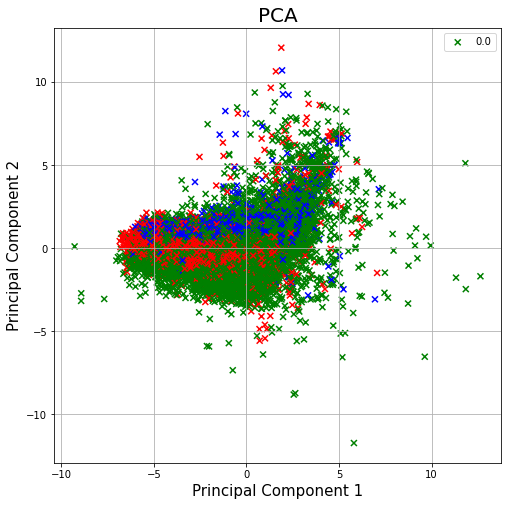

In [31]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA', fontsize = 20)
colors = {'0.0':'green','1.0':'red', '2.0':'blue'} # 0.0 = uncertain, 1.0 = spiral, 2.0 = elliptical
ax.scatter(principalDf['principal component 1'], principalDf['principal component 2'],
           c=principalDf['labels'].apply(lambda x: colors[x]), marker="x")
ax.legend(colors)
ax.grid()

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(df_norm)
print(pca.explained_variance_ratio_)
print("Explican el {:2.4f} % de la varianza total".format((pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1])*100))

[0.86869571 0.07596138 0.03565365]
Explican el 94.4657 % de la varianza total


In [19]:
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2','principal component 3'])
labels_df = pd.DataFrame({'labels':labels})
principalDf = pd.concat([principalDf, labels_df], axis=1)

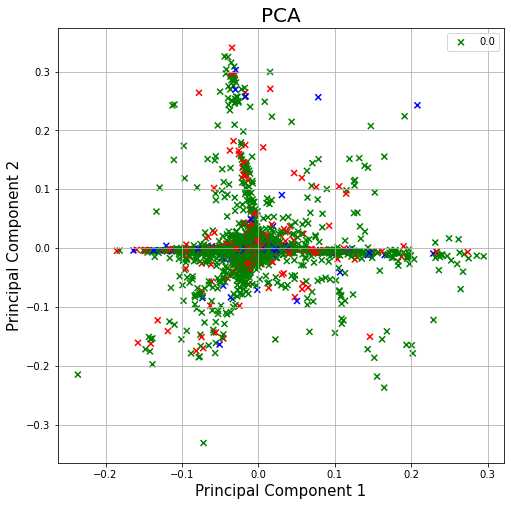

In [20]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA', fontsize = 20)
colors = {'0.0':'green','1.0':'red', '2.0':'blue'} # 0.0 = uncertain, 1.0 = spiral, 2.0 = elliptical
ax.scatter(principalDf['principal component 2'], principalDf['principal component 3'],
           c=principalDf['labels'].apply(lambda x: colors[x]), marker="x")
ax.legend(colors)
ax.grid()

*** Mixtura Gaussiana ***

Ajustamos por una mixtura gaussiana ya que es más rápido de entrenar. Un modelo k-means ajusta rápidamente en relación a otros modelos. No obstante, para la cantidad de datos disponibles, resulta muy lento calcular los coeficientes de silueta. 

Como no tenemos una hipótesis acerca del número de clusters que pueden haber, ajustamos distintas mixturas gaussianas para un amplio número de clusters y elegimos aquel modelo cuyo criterio de información bayesiana sea el menor.

In [32]:
lowest_bic = np.infty
bic = []
n_components_range = range(1, 10)
cv_types = ['diag','full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(X)
        bic.append(gmm.bic(X))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)

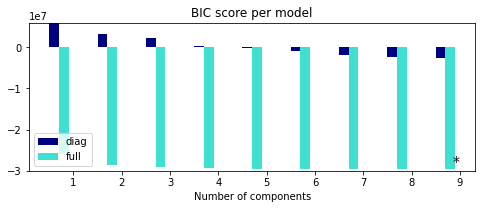

In [33]:
clf = best_gmm
bars = []
import itertools
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
# Plot the BIC scores
plt.figure(figsize=(8, 6))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)

Vemos que el BIC para distintos números de cluster es muy similar en un modelo con 2 a 9 clusters. No habrá tanta diferencia en trabajar con alguno de estos modelos en términos de cómo ajustan. Probamos por ejemplo con 3 y visualizamos los resultados en la versión de dimensión reducida de los componentes principales.

In [34]:
gmm = GaussianMixture(n_components=3)
gmm.fit(X)
gm_labels = gmm.predict(X)

<AxesSubplot:xlabel='principal component 1', ylabel='principal component 2'>

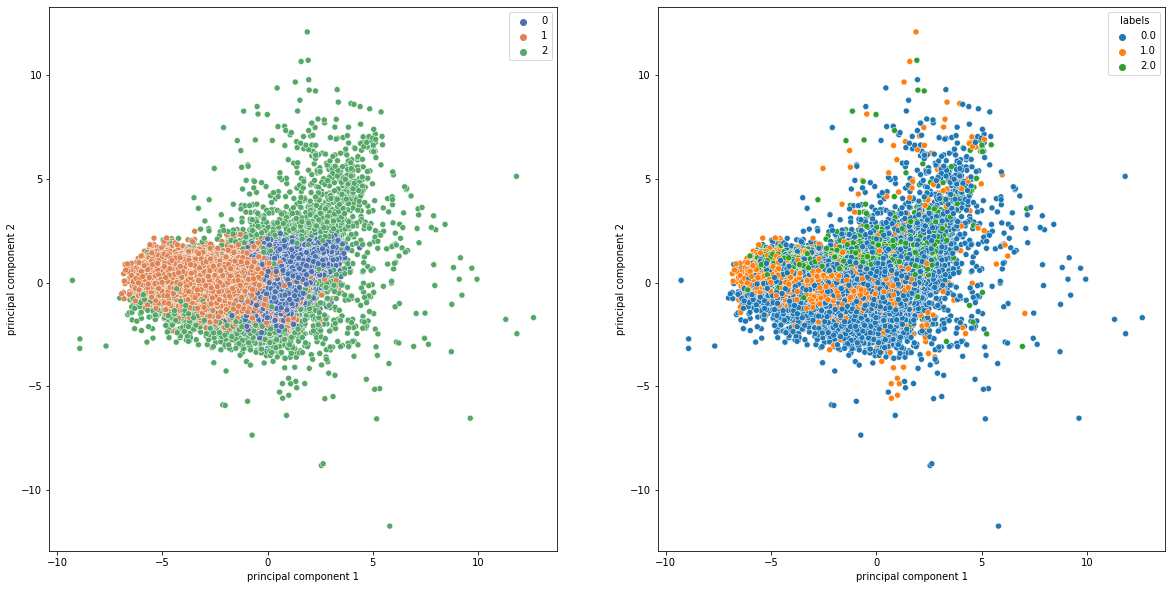

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
sns.scatterplot(principalDf['principal component 1'],principalDf['principal component 2'],hue=gm_labels, palette= sns.color_palette("deep", 3), ax=axes[0])
sns.scatterplot(principalDf['principal component 1'],principalDf['principal component 2'],hue=principalDf['labels'], ax=axes[1])

<AxesSubplot:ylabel='count'>

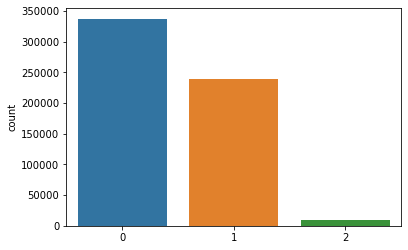

In [36]:
sns.countplot(gm_labels)

El modelo de clustering no nos ofrece visualmente algo discernible pero hay cierto agrupamiento en el medio. Si hacemos un gráfico de barras para visualizar la cantidad de galaxias agrupadas en cada cluster, vemos lo siguiente.

Hay un sólo grupo con muy pocas galaxias en relación a los otros. Ajustamos un modelo de mixtura gaussiana con mayor número de cluster y los resultados son similares. Encontramos uno o dos grupos con pocas galaxias en relación a los otros. Gráficamente, estos clusters con pocas galaxias son los que más se alejan del centro $(0,0)$ del gráfico de los componentes principales. Comparando con el gráfico de los componentes agrupado por tipo morfológico de galaxia, no hay relación entre las galaxias que más se alejan del centro en el modelo de clustering y el tipo de galaxia.

En conclusión (por el momento), existen grupos de galaxias (aquellas más cerca del centro en nuestro gráfico) que se encuentran más concentradas y cercanas entre sí en relación a un pequeño grupo de galaxias. Entonces, estamos en condiciones de afirmar que estas galaxias representan valores atípicos o outliers. Ahora estudiamos estos dos grandes grupos por separado.

Hacemos nuevamente un PCA para tener una mejor herramienta visual

In [37]:
indices = list(np.where(principalDf.loc[gm_labels == 2])[0])
outliers = X.iloc[indices]

In [38]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X.iloc[indices])
print(pca.explained_variance_ratio_)
print("Explican el {:2.4f} % de la varianza total".format((pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1])*100))

[0.70988607 0.23987702]
Explican el 94.9763 % de la varianza total


In [39]:
outliersDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

<AxesSubplot:xlabel='principal component 1', ylabel='principal component 2'>

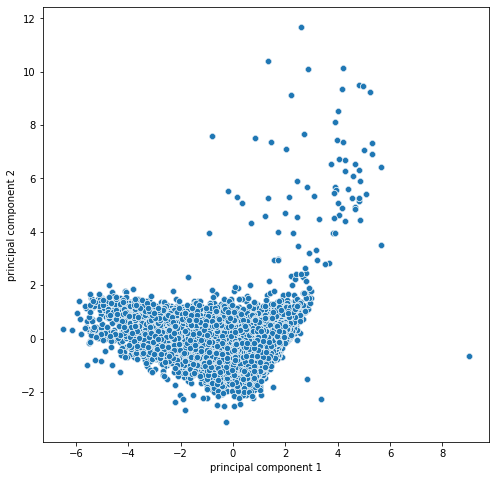

In [40]:
fig = plt.figure(figsize = (8,8))
sns.scatterplot(outliersDf['principal component 1'],outliersDf['principal component 2'])

El gráfico no revela nada nuevo. Al igual que antes, tenemos un grupo mayoritario de galaxias en el centro y algunas galaxias más alejadas. Sin embargo, como el número de galaxias es menor podemos proceder por hacer varios análisis de cluster.

*** Mixtura Gaussiana ***

In [46]:
gmm_outliers = GaussianMixture(n_components=2)
gmm_outliers.fit(outliers)
gm_outliers_labels = gmm_outliers.predict(outliers)
print("BIC: ", gmm_outliers.bic(outliers))
print("Silhouette Coefficient: %0.3f"% silhouette_score(outliers, gm_outliers_labels))

BIC:  -1730736.6071897657
Silhouette Coefficient: 0.540


<AxesSubplot:xlabel='principal component 1', ylabel='principal component 2'>

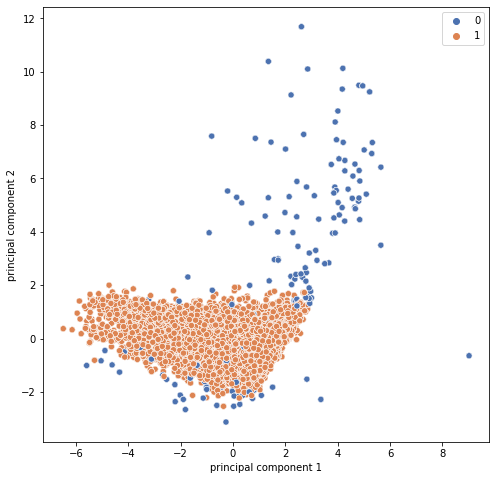

In [47]:
fig = plt.figure(figsize = (8,8))
sns.scatterplot(outliersDf['principal component 1'], outliersDf['principal component 2'],hue=gm_outliers_labels, palette= sns.color_palette("deep", 2))

*** K-Means ***

In [70]:
from sklearn.metrics import silhouette_score
for n in range(2,6):
    km = KMeans(n_clusters=n, n_jobs=-1)
    km.fit(outliers)
    k_means_labels = km.labels_
    print('Para',n,' clusters, la suma de los cuadrados de las distancias al cluster / Inertia: ', km.inertia_)
    sil_avg = silhouette_score(outliers,k_means_labels)
    print('Para',n,'clusters, coeficiente de Silueta: ', sil_avg)

Para 2  clusters, la suma de los cuadrados de las distancias al cluster / Inertia:  67148.68569855485
Para 2 clusters, coeficiente de Silueta:  0.48338245843453087
Para 3  clusters, la suma de los cuadrados de las distancias al cluster / Inertia:  50071.081609041896
Para 3 clusters, coeficiente de Silueta:  0.3587997774490587
Para 4  clusters, la suma de los cuadrados de las distancias al cluster / Inertia:  37760.549002471926
Para 4 clusters, coeficiente de Silueta:  0.3719277178904117
Para 5  clusters, la suma de los cuadrados de las distancias al cluster / Inertia:  28482.814165929307
Para 5 clusters, coeficiente de Silueta:  0.3892974208100677


Vemos que el ajuste de los modelos K-Means es bastante pobre ya que el coeficiente de silueta en cada uno es menor a 0.7.

In [86]:
outliers_scaled = StandardScaler().fit_transform(outliers)
for e in [0.5,1,2,5]:
    dbscan = DBSCAN(eps=e, n_jobs=-1)
    dbscan.fit(outliers_scaled)
    dbscan_labels = dbscan.labels_
    n_clusters_ = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
    n_noise_ = list(dbscan_labels).count(-1)
    print("Epsilon = ", e)
    print("Numero estimado de clusters para DBSCAN : %d" % n_clusters_)
    print("Numero estimado de puntos de ruido para DBSCAN : %d" % n_noise_)
    print("Silhouette Coefficient: %0.3f"% silhouette_score(outliers, dbscan_labels))
    print("____________")

Epsilon =  0.5
Numero estimado de clusters para DBSCAN : 26
Numero estimado de puntos de ruido para DBSCAN : 1492
Silhouette Coefficient: -0.609
____________
Epsilon =  1
Numero estimado de clusters para DBSCAN : 14
Numero estimado de puntos de ruido para DBSCAN : 424
Silhouette Coefficient: 0.338
____________
Epsilon =  2
Numero estimado de clusters para DBSCAN : 2
Numero estimado de puntos de ruido para DBSCAN : 116
Silhouette Coefficient: 0.641
____________
Epsilon =  5
Numero estimado de clusters para DBSCAN : 1
Numero estimado de puntos de ruido para DBSCAN : 36
Silhouette Coefficient: 0.741
____________


Con el algoritmo DBSCAN, hay un ajuste para $k=2$ al igual que la Mixtura Gaussiana. Sin embargo, para $k=1$ se logra al menos obtener coeficiente de silueta mayor o igual a 0.7 donde el resto es ruido. La ventaja de DBSCAN es que permite identificar outliers. Es decir, podemos encontra uno sólo grupo y el resto representa ruido. 

Ajustamos el coeficiente ```eps``` para encontrar un mejor agrupamiento.

In [102]:
e = 6
dbscan = DBSCAN(eps=e, n_jobs=-1)
dbscan.fit(outliers_scaled)
dbscan_labels = dbscan.labels_
n_clusters_ = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise_ = list(dbscan_labels).count(-1)
print("Epsilon = ", e)
print("Numero estimado de clusters para DBSCAN : %d" % n_clusters_)
print("Numero estimado de puntos de ruido para DBSCAN : %d" % n_noise_)
print("Silhouette Coefficient: %0.3f"% silhouette_score(outliers, dbscan_labels))
print("____________")

Epsilon =  6
Numero estimado de clusters para DBSCAN : 1
Numero estimado de puntos de ruido para DBSCAN : 32
Silhouette Coefficient: 0.760
____________


El hecho de que el modelo que mejor ajusta detecte sólo un grupo quiere decir este grupo que hemos postulado como "outliers" es bastante homogéneo.

<AxesSubplot:xlabel='principal component 1', ylabel='principal component 2'>

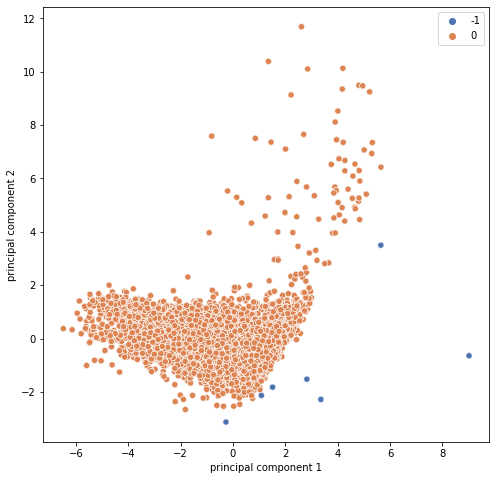

In [103]:
fig = plt.figure(figsize = (8,8))
sns.scatterplot(outliersDf['principal component 1'], outliersDf['principal component 2'],hue=dbscan_labels, palette= sns.color_palette("deep",2))

Conclusión: Hemos encontrado un nuevo conjunto homogéneo de galaxias que representan valores atípicos en todo el conjunto de la base de datos.

In [49]:
indices = list(np.where(principalDf.loc[gm_labels != 2])[0])
df = X.iloc[indices]

In [50]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X.iloc[indices])
print(pca.explained_variance_ratio_)
print("Explican el {:2.4f} % de la varianza total".format((pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1])*100))

[0.784317   0.18468793]
Explican el 96.9005 % de la varianza total


In [51]:
Df = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

<AxesSubplot:xlabel='principal component 1', ylabel='principal component 2'>

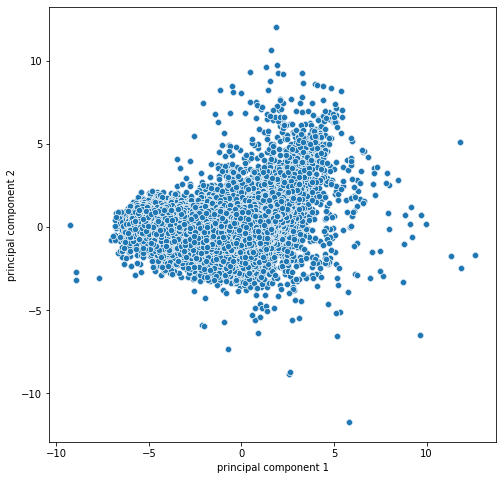

In [52]:
fig = plt.figure(figsize = (8,8))
sns.scatterplot(Df['principal component 1'],Df['principal component 2'])

Conclusión: Analizando el gráfico con los componentes principales, obtenemos conclusiones parecidas al análisis anterior. El objetivo de encontrar clusters consiste en que estos sean homogéneos dentro de ellos y heterogéneos entre sí. Concluimos que no existe gran heterogeneidad entre las galaxias del conjunto sin los outliers detectados. 

**Conclusión general**: Utilizando datos fotométricos, en nuestro análisis de conglomerados sólo hemos podido detectar la presencia de valores atípicos en vez de un conjunto de clusters o grupos bien diferenciados entre sí como era de esperarse. Asimismo, pudimos ver que aquellas galaxias identificadas como outliers no dependen de su tipo morfológico (espiral, elíptica o desconocida). Al menos no son del tipo "unknown" exclusivamente como uno puede creer apriori.

En caso de querer extender el análisis. Se podría tomar los modelos de clasificación con los tres tipos morfológicos (cuyo desempeño era menor que sólo tomando galaxias espirales y elípticas) sin los outliers detectados para ver si mejora la predicción de los modelos. Por otro lado, sería posible con estas nuevas etiquetas ("outliers" y "no-outliers") ver su posición en la distribución de galaxias en la bóveda celeste.